In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [22]:
X_train = np.loadtxt("input.csv",delimiter = ',')
Y_train = np.loadtxt("labels.csv",delimiter = ',')
X_test = np.loadtxt("input_test.csv",delimiter = ',')
Y_test = np.loadtxt("labels_test.csv",delimiter = ',')

In [23]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [25]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

# Model


In [26]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [29]:
model.fit(X_train,Y_train, epochs = 5 ,batch_size=64)

Epoch 1/5
32/32 [==============================] - 4s 88ms/step - loss: 0.7382 - accuracy: 0.5305
Epoch 2/5
32/32 [==============================] - 3s 93ms/step - loss: 0.6558 - accuracy: 0.6220
Epoch 3/5
32/32 [==============================] - 6s 185ms/step - loss: 0.5937 - accuracy: 0.6935
Epoch 4/5
32/32 [==============================] - 5s 166ms/step - loss: 0.5558 - accuracy: 0.7165
Epoch 5/5
32/32 [==============================] - 6s 183ms/step - loss: 0.4813 - accuracy: 0.7655


In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [31]:
model.fit(X_train,Y_train, epochs = 5 ,batch_size=64)

Epoch 1/5
32/32 [==============================] - 4s 89ms/step - loss: 0.5085 - accuracy: 0.7520
Epoch 2/5
32/32 [==============================] - 3s 81ms/step - loss: 0.4216 - accuracy: 0.8130
Epoch 3/5
32/32 [==============================] - 3s 85ms/step - loss: 0.3433 - accuracy: 0.8495
Epoch 4/5
32/32 [==============================] - 3s 85ms/step - loss: 0.3037 - accuracy: 0.8760
Epoch 5/5
32/32 [==============================] - 3s 85ms/step - loss: 0.2348 - accuracy: 0.9125


In [32]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 43ms/step - loss: 0.7866 - accuracy: 0.6875


[0.7865645885467529, 0.6875]

# MakingPredictions

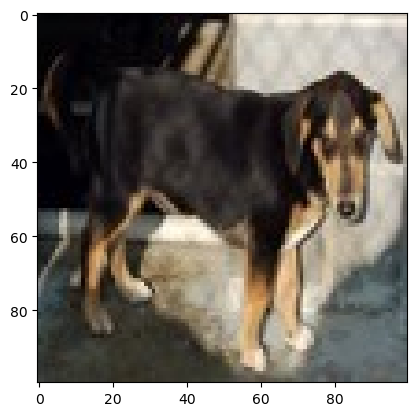

1/1 [==============================] - 0s 15ms/step
[[0.03093588]]
This is a dog


In [41]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
print(y_pred)

y_pred = y_pred>0.5

if (y_pred == 0):
    print("This is a dog")
else:
    print("This is a cat")